In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Downloaded variant data from https://www.kaggle.com/code/lumierebatalong/covid-19-wave-variant-tracker

## Import Dataframe

In [2]:
raw_confirmed = pd.read_csv("../Dataframes/CONVENIENT_global_confirmed_cases.csv")

In [3]:
raw_confirmed.drop(0, inplace=True)
raw_confirmed.reset_index(drop=True, inplace=True)

Confirmed cases by country

In [25]:
raw_confirmed.head(10)

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0


## Data Pre-Processing

#### Date Values
As we can see above, the columns are almost all float values, with one column containing the dates. We will seperate the dates for the moment so the preprocessing steps for both data types can be done seperately. For the date values, we will be checking if there are any missing values.

In [5]:
# Assuming 'Date' is the name of the column containing dates
date_series = raw_confirmed['Country/Region']

# Rename the 'Country/Region' column to 'Date'
date_series.name = 'Date'

# Remove the 'Country/Region' column from raw_confirmed
raw_confirmed.drop(columns=['Country/Region'], inplace=True)

date_series

0      1/23/20
1      1/24/20
2      1/25/20
3      1/26/20
4      1/27/20
        ...   
805     4/7/22
806     4/8/22
807     4/9/22
808    4/10/22
809    4/11/22
Name: Date, Length: 810, dtype: object

In [27]:
# Step 1: Convert date column to datetime format (if not already)
date_series = pd.to_datetime(date_series)

# Step 2: Generate a range of dates covering the entire period
start_date = date_series.min()
end_date = date_series.max()
full_date_range = pd.date_range(start=start_date, end=end_date)

# Step 3: Compare the range of dates with the dates in the date series
missing_dates = full_date_range[~full_date_range.isin(date_series)]

# Step 4: Print any missing dates
if not missing_dates.empty:
    print("Missing dates:")
    print(missing_dates)
else:
    print("No missing dates found.")


No missing dates found.


#### Values for number of cases

Most of the pre-processing will occur here. We will be carefully going through the data to ensure there are no errors, missing values, or anything else that could throw off our results.

We found that there was a number of countries that were divided into smaller regions. Since we cannot be sure of how they were divided and how much overlap occured between populations, we will remove them as there are plenty of other countries to use for our purposes.

In [6]:
print(raw_confirmed.dtypes.unique())

[dtype('float64') dtype('O')]


In [7]:
# Check data types, excluding the first row (titles)
object_columns = raw_confirmed.iloc[1:].select_dtypes(include=['object']).columns
print(object_columns)

Index(['Australia', 'Australia.1', 'Australia.2', 'Australia.3', 'Australia.4',
       'Australia.5', 'Australia.6', 'Australia.7', 'Canada', 'Canada.1',
       'Canada.2', 'Canada.3', 'Canada.4', 'Canada.5', 'Canada.6', 'Canada.7',
       'Canada.8', 'Canada.9', 'Canada.10', 'Canada.11', 'Canada.12',
       'Canada.13', 'Canada.14', 'Canada.15', 'China', 'China.1', 'China.2',
       'China.3', 'China.4', 'China.5', 'China.6', 'China.7', 'China.8',
       'China.9', 'China.10', 'China.11', 'China.12', 'China.13', 'China.14',
       'China.15', 'China.16', 'China.17', 'China.18', 'China.19', 'China.20',
       'China.21', 'China.22', 'China.23', 'China.24', 'China.25', 'China.26',
       'China.27', 'China.28', 'China.29', 'China.30', 'China.31', 'China.32',
       'China.33', 'Denmark', 'Denmark.1', 'France', 'France.1', 'France.2',
       'France.3', 'France.4', 'France.5', 'France.6', 'France.7', 'France.8',
       'France.9', 'France.10', 'Netherlands', 'Netherlands.1',
       'Neth

In [8]:
# Identify columns containing object types
object_columns = raw_confirmed.select_dtypes(include=['object']).columns

# Remove columns containing object types
cleaned_df = raw_confirmed.drop(columns=object_columns)

cleaned_df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.0,53.0,2.0,304.0,0.0,0.0,18.0,1842.0,19.0,16479.0,...,654.0,35.0,202.0,81.0,90228.0,0.0,0.0,0.0,125.0,67.0
806,0.0,28.0,7.0,0.0,0.0,0.0,0.0,1993.0,14.0,14085.0,...,555.0,27.0,7.0,139.0,65097.0,0.0,0.0,0.0,0.0,55.0
807,0.0,55.0,6.0,0.0,0.0,0.0,0.0,840.0,19.0,12504.0,...,566.0,46.0,203.0,48.0,34140.0,0.0,0.0,1.0,0.0,0.0
808,0.0,28.0,4.0,0.0,0.0,0.0,0.0,453.0,15.0,10635.0,...,334.0,31.0,355.0,98.0,28307.0,0.0,0.0,0.0,0.0,33.0


With the remaining columns we want to check for any invalid values, like negative or NaN values.

In [10]:
# Check for any NaN or negative values in the remaining columns of raw_confirmed
nan_values = cleaned_df.isna().sum()
negative_values = (cleaned_df < 0).sum()

# Print columns with NaN values
nan_columns = nan_values[nan_values > 0]
if not nan_columns.empty:
    print("Columns with NaN values:")
    print(nan_columns)

# Print columns with negative values
negative_columns = negative_values[negative_values > 0]
if not negative_columns.empty:
    print("\nColumns with negative values:")
    print(negative_columns)




Columns with negative values:
Afghanistan                          2
Antigua and Barbuda                  2
Bahamas                              1
Benin                                1
Brazil                               1
Brunei                               1
Cote d'Ivoire                        1
Czechia                              2
Denmark.2                            1
Dominica                             1
Ecuador                              5
El Salvador                          1
Equatorial Guinea                    1
France.11                           14
Gambia                               1
Germany                              1
Grenada                              1
Guyana                               1
Honduras                             1
Iceland                              1
Ireland                              4
Israel                               3
Italy                                1
Jordan                               1
Kazakhstan                       

In [22]:
# Find indices of negative values
negative_indices = np.where(cleaned_df < 0)

# Iterate over each negative index
for row, col in zip(*negative_indices):
    # Calculate the mean of neighboring days
    if col > 0 and col < len(cleaned_df.columns) - 1:
        before_mean = cleaned_df.iloc[row, col - 1]
        after_mean = cleaned_df.iloc[row, col + 1]
        replacement_value = (before_mean + after_mean) / 2.0
        # Replace negative value with mean of neighboring days
        cleaned_df.iloc[row, col] = replacement_value

Since there appear to be negative values in the dataset, I need to find a way to remove them from the dataset as they are considered invalid, we cannot have a day where there were negative cases reported. We will use the mean of the days before and after the negative value, to maintain the general shape of the graph.

In [11]:
num_rows, num_columns = cleaned_df.shape

# Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 810
Number of columns: 195


According to this figure, we are left with 195 countries to use in our analysis.

In [12]:
# Get the column names
column_names = cleaned_df.columns.tolist()

# Print the column names
for name in column_names:
    print(name)

Afghanistan
Albania
Algeria
Andorra
Angola
Antarctica
Antigua and Barbuda
Argentina
Armenia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Central African Republic
Chad
Chile
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark.2
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France.11
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS Zaandam
Madagascar
Malawi
Malaysia
Maldives
Mali
M

Now that the data is clean, we can merge with the dates for our final dataframe.

In [29]:
# Merge date_series with raw_confirmed
processed_data = pd.concat([date_series, cleaned_df], axis=1)
processed_data.head(10)

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0


## Confirming clean datasets

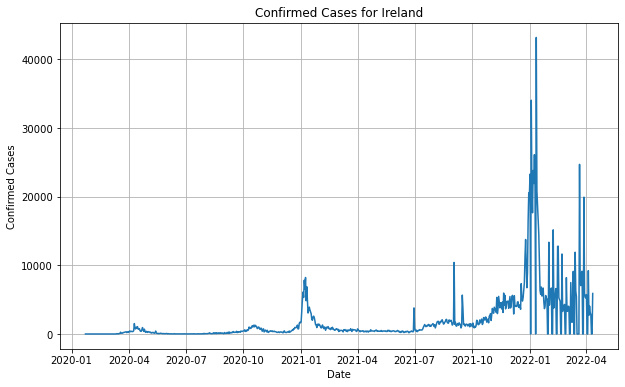

In [24]:
dates = pd.to_datetime(processed_data.iloc[:, 0])

# Extract the values for the desired country
country_column = 'Ireland'  # Replace 'Country_Name' with the actual column name
country_values = processed_data[country_column]

# Plot the values against the dates
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(dates, country_values)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases for {}'.format(country_column))
plt.grid(True)
plt.show()

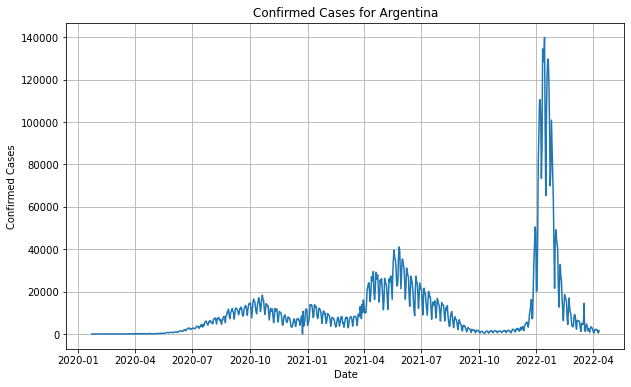

In [20]:
dates = pd.to_datetime(processed_data.iloc[:, 0])

# Extract the values for the desired country
country_column = 'Argentina'  # Replace 'Country_Name' with the actual column name
country_values = raw_confirmed[country_column]

# Plot the values against the dates
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(dates, country_values)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases for {}'.format(country_column))
plt.grid(True)
plt.show()

Export cleaned data as csv

In [28]:
processed_data.to_csv("../Dataframes/processed_data.csv", index=False)